#### CO2 Emissions by sector - EU27 & UK (2019 and 2020)

We present the estimates of daily, sector-specific, country-level (EU27 & UK) CO2 emissions from January 1st, 2019 to June 30th, 2020, constructed primarily from near-real-time activity data, results of the international research initiative Carbon Monitor (https://carbonmonitor.org/). These estimates provide a picture of the daily, weekly, and seasonal dynamics of CO2 emissions before and after the COVID-19 pandemic and the economic downturn that it has triggered.

Daily CO2 emissions by sectors in 2019 and January 1st through July 1st 2020 for 
a) Power sector, 
b) Ground transportation sector, 
b) Industry sector,
d) Residential sector, and 
e) Aviation (domestic) sector 

We begin by analyzing the column features

Analyzing data from the source datasets We import the required modules

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages


In [2]:
df_sector = pd.read_excel(r'C:\Users\a687u420\OneDrive - The University of Kansas\KU courses\Fall 2020\Project\Data\Carbon monitor\carbon-monitor-EU27 & UK.xlsx')
df_sector.head(10)

,date,sector,MtCO2
0,01/01/2019,Power,2.024268
1,02/01/2019,Power,3.093331
2,03/01/2019,Power,3.875737
3,04/01/2019,Power,3.888809
4,05/01/2019,Power,3.332173
5,06/01/2019,Power,3.341495
6,07/01/2019,Power,3.722960
7,08/01/2019,Power,3.441153
8,09/01/2019,Power,3.804412
9,10/01/2019,Power,4.369427


In [3]:
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2735 non-null   object 
 1   sector  2735 non-null   object 
 2   MtCO2   2735 non-null   float64
dtypes: float64(1), object(2)
memory usage: 64.3+ KB


In [4]:
df_sector.index=pd.to_datetime(df_sector.date,format='%d/%m/%Y')
df_sector = df_sector.set_index('date')
df_sector.index
df_sector.head(10)

,sector,MtCO2
date,,
01/01/2019,Power,2.024268
02/01/2019,Power,3.093331
03/01/2019,Power,3.875737
04/01/2019,Power,3.888809
05/01/2019,Power,3.332173
06/01/2019,Power,3.341495
07/01/2019,Power,3.722960
08/01/2019,Power,3.441153
09/01/2019,Power,3.804412


In [5]:
ts = df_sector[pd.Series(pd.to_datetime(df_sector.index, errors='coerce')).notnull().values]
ts.head(15)

,sector,MtCO2
date,,
01/01/2019,Power,2.024268
02/01/2019,Power,3.093331
03/01/2019,Power,3.875737
04/01/2019,Power,3.888809
05/01/2019,Power,3.332173
06/01/2019,Power,3.341495
07/01/2019,Power,3.722960
08/01/2019,Power,3.441153
09/01/2019,Power,3.804412


In [6]:
ts.dtypes

sector     object
MtCO2     float64
dtype: object

In [7]:
#ss = ts.copy(deep=True)
ts['MtCO2'] = pd.to_numeric(ts['MtCO2'] , errors='coerce')
ts.head(20)

,sector,MtCO2
date,,
01/01/2019,Power,2.024268
02/01/2019,Power,3.093331
03/01/2019,Power,3.875737
04/01/2019,Power,3.888809
05/01/2019,Power,3.332173
06/01/2019,Power,3.341495
07/01/2019,Power,3.722960
08/01/2019,Power,3.441153
09/01/2019,Power,3.804412


In [8]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2735 entries, 01/01/2019 to 30/09/2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sector  2735 non-null   object 
 1   MtCO2   2735 non-null   float64
dtypes: float64(1), object(1)
memory usage: 64.1+ KB


In [9]:
ts.dropna(inplace = True)

In [10]:
Energy_sources = ts.groupby('sector')
Energy_sources.head()

,sector,MtCO2
date,,
01/01/2019,Power,2.024268
02/01/2019,Power,3.093331
03/01/2019,Power,3.875737
04/01/2019,Power,3.888809
05/01/2019,Power,3.332173
01/01/2019,Ground Transport,1.660384
02/01/2019,Ground Transport,1.866300
03/01/2019,Ground Transport,2.388637
04/01/2019,Ground Transport,2.441105


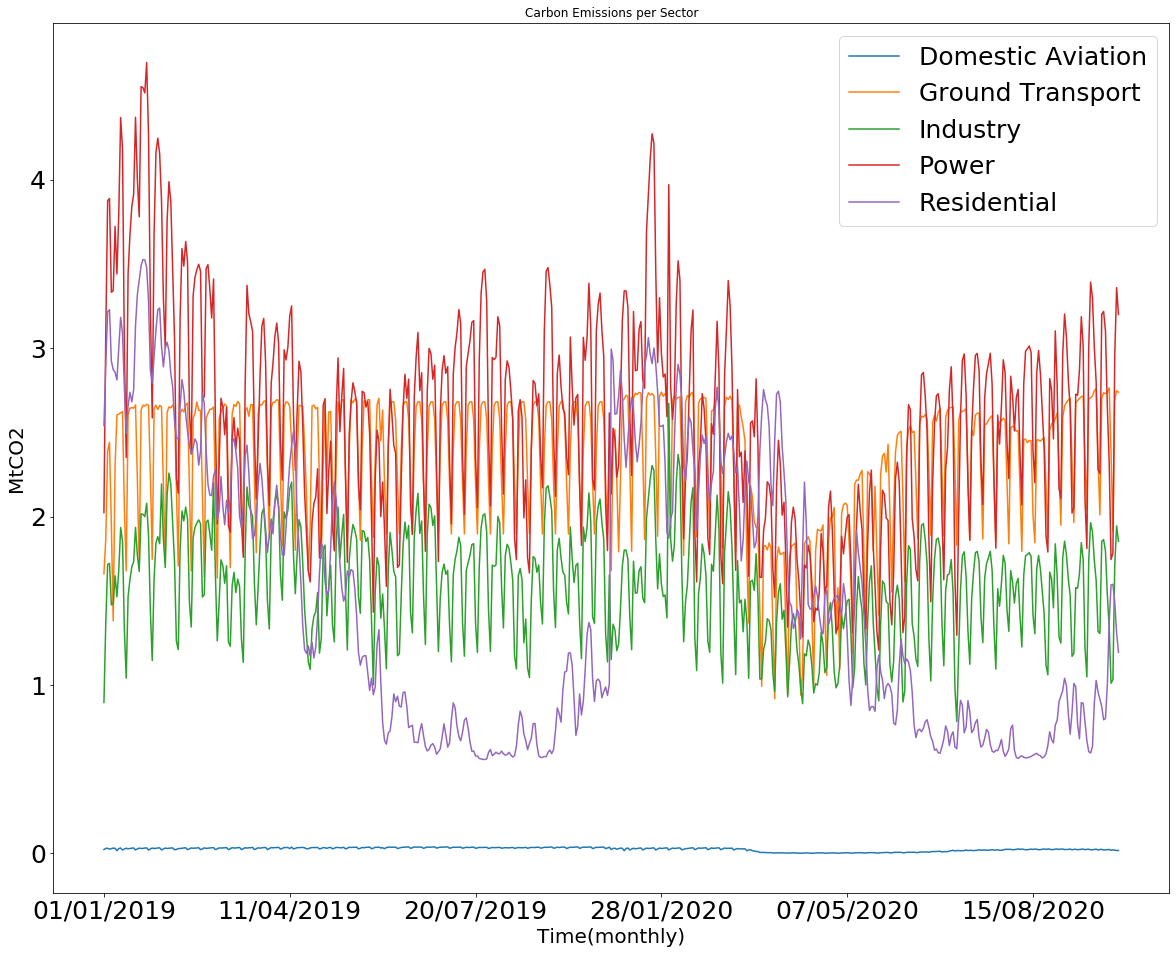

In [11]:
#Global CO2 emission by sector
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(y='MtCO2', label=desc,ax = ax, title='Carbon Emissions per Sector', fontsize = 25)
    ax.set_xlabel('Time(monthly)')
    ax.set_ylabel('MtCO2')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 25)

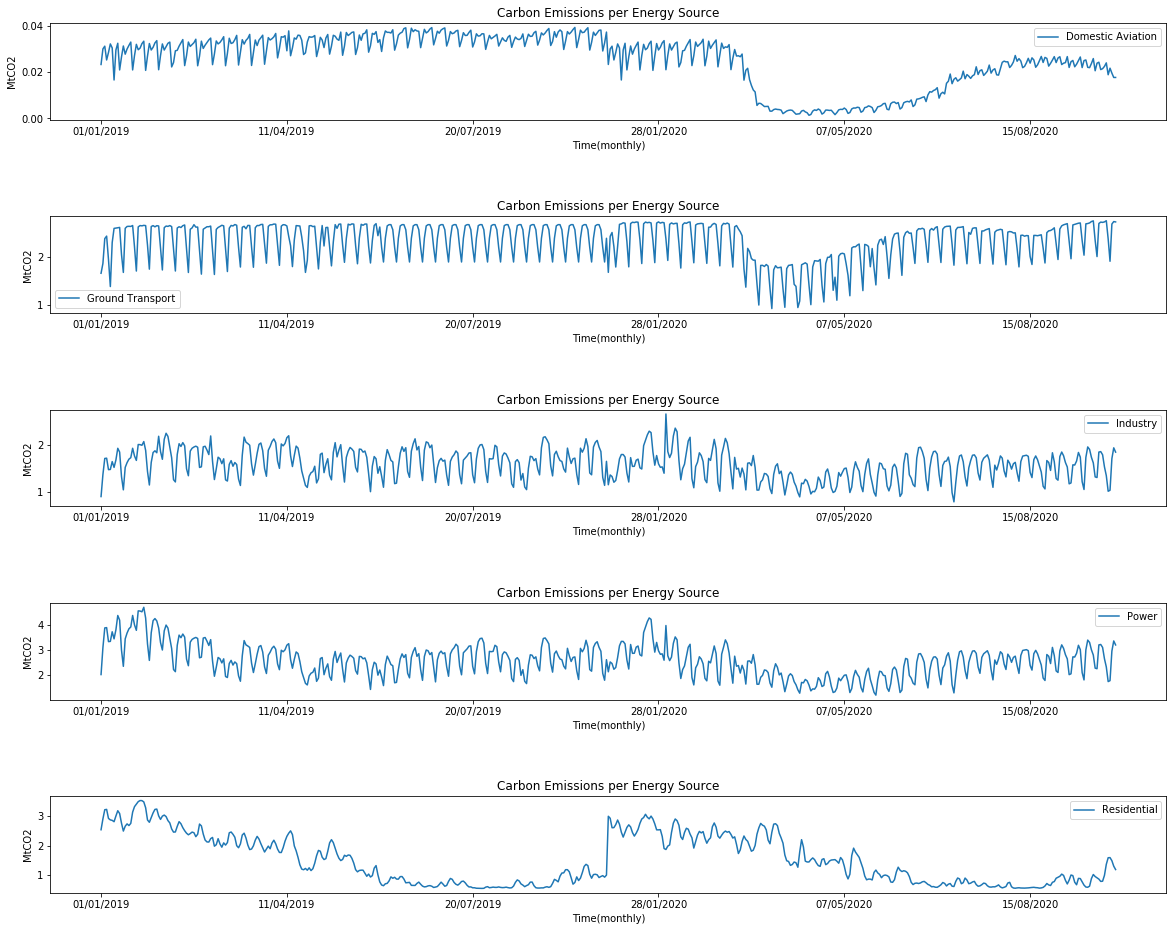

In [12]:
#Plotting sectorwise for better interpretation

fig, axes = plt.subplots(5,1)
plt.subplots_adjust(hspace=1)
for (desc, group), ax in zip(Energy_sources, axes):
    group.plot(y='MtCO2', ax=ax, label=desc, title='Carbon Emissions per Energy Source')
    ax.set_xlabel('Time(monthly)')
    ax.set_ylabel('MtCO2')
plt.show()

As observed, the ground transport, Industry , power, and Residential were all affected past March 2020 as compared to other countries but quiet similar to India and US.